# **Gói phần mềm ứng dụng cho tài chính 1.**
# **Dự báo giá cổ phiếu trên thị trường chứng khoán Việt Nam: Phương pháp tiếp cận tích hợp giữa phân tích tài chính và học máy bằng Python**
***
**Nhóm 1**
1. Trần Nguyễn Thu Hà - K234141646
2. Trương Ngân Châu - K224030422
3. Phan Nguyễn Xuân Toàn - K224141699
***
Giảng viên hướng dẫn: ThS. Ngô Phú Thanh
***
# **Tổng quan nghiên cứu**
***
Sự phát triển mạnh mẽ của thị trường chứng khoán Việt Nam, đặc biệt là nhóm cổ phiếu ngân hàng, đi kèm với mức độ biến động cao, làm gia tăng rủi ro đầu tư. Trong bối cảnh đó, việc dự báo rủi ro cổ phiếu trở thành nhu cầu cấp thiết nhằm hỗ trợ nhà đầu tư và tổ chức tài chính ra quyết định hiệu quả hơn. Nghiên cứu này tập trung xây dựng mô hình lai (Hybrid Model) kết hợp giữa các mô hình tài chính truyền thống (CAPM, GARCH) và mô hình học máy hiện đại (LSTM, XGBoost) để dự báo rủi ro cổ phiếu ngân hàng Việt Nam giai đoạn 2019–2024. Kết quả dự báo sẽ giúp đề xuất các khuyến nghị về quản trị rủi ro và đầu tư an toàn, góp phần hướng tới sự phát triển bền vững của thị trường tài chính.

**Mục tiêu nghiên cứu:**
Nghiên cứu nhằm phân tích dữ liệu cụ thể của nhóm cổ phiếu ngân hàng Việt Nam để xây dựng và đánh giá hiệu quả các mô hình học máy và học sâu trong dự báo rủi ro cổ phiếu bao gồm:
- Sử dụng các chỉ số tài chính và kỹ thuật như SMA, RSI, MACD, ATR, Bollinger Bands...
- Tính toán và phân tích rủi ro hệ thống và phi hệ thống thông qua mô hình CAPM.
- Ước lượng và dự báo biến động lợi suất bằng mô hình GARCH.
- Ứng dụng các mô hình học sâu như LSTM và mô hình tăng cường như XGBoost để dự báo độ biến động (volatility).
- Kết hợp các mô hình trên thành mô hình lai (Hybrid Model) nhằm nâng cao độ chính xác trong dự báo rủi ro cổ phiếu ngân hàng.


***

**Nghiên cứu này được chia thành 4 giai đoạn (phase)**
:
1. Data colection and preparation
2. Data Visualization and Exploration
3. Machine Learning & Hybrid Models
  - Camp
  - XGBoost
  - LSTM Model
  - Hybrid / Stacking Ensemble
4. Validation of the Stacking Model's Effectiveness for Volatility Risk Prediction



***
# **Phase 1: Data colection and preparation**
***

Importing Libraries:
    

In [208]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import statistics
from statistics import mode
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [209]:
warnings.filterwarnings('ignore')
url_data = 'https://drive.google.com/file/d/1sOJPyBCFvnUwIZnIlhMxF2CBqdTDYz8V/view?usp=sharing'
url_data = 'https://drive.google.com/uc?id=' + url_data.split('/')[-2]
df = pd.read_csv(url_data, sep=",")

#read file codebook from google drive
url_cols = 'https://drive.google.com/file/d/14M5XiPGOhcT2C2asu-Cx8ZvqT6tiNZMW/view?usp=sharing'
url_cols = 'https://drive.google.com/uc?id=' + url_cols.split('/')[-2]
cols = pd.read_csv(url_cols, index_col=0, sep=";")
df

,date,ticker,open,high,low,close,volume,log_return,VNI_log_return
0,02/01/2020,ACB,22.80,23.00,22.70,6.64,1163109.0,0.009077,0.005893
1,03/01/2020,ACB,23.00,23.20,22.90,6.64,1055528.0,0.000000,-0.001584
2,06/01/2020,ACB,23.00,23.00,22.50,6.50,1286035.0,-0.021310,-0.009735
3,07/01/2020,ACB,22.50,22.70,22.50,6.50,1050934.0,0.000000,0.003228
4,08/01/2020,ACB,22.50,22.50,22.00,6.38,2304937.0,-0.018634,-0.010378
...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.95,19.30,18.80,18.69,14786600.0,0.012924,0.010796
17422,26/12/2024,VPB,19.25,19.30,19.05,18.74,8211900.0,0.002672,-0.000919
17423,27/12/2024,VPB,19.20,19.35,19.10,18.74,16560300.0,0.000000,0.001782
17424,30/12/2024,VPB,19.20,19.25,19.10,18.74,6678700.0,0.000000,-0.002450


In [210]:
pd.set_option('display.max_rows', 80)
print('Data type per column:')
df.dtypes

Data type per column:


date               object
ticker             object
open              float64
high              float64
low               float64
close             float64
volume            float64
log_return        float64
VNI_log_return    float64
dtype: object

In [211]:
print('Statistical summary:')
df.describe()

Statistical summary:


,open,high,low,close,volume,log_return,VNI_log_return
count,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,1.742600e+04
mean,30.768777,31.718356,30.342861,18.643469,7.945893e+06,0.000871,-4.481426e+08
std,19.112257,72.294428,18.914823,11.434356,8.773018e+06,0.022385,2.229380e+10
min,5.500000,5.900000,5.100000,1.750000,1.285000e+04,-0.165293,-5.888029e+11
25%,19.100000,19.350000,18.800000,11.170000,1.962752e+06,-0.009160,-4.629457e-03
50%,25.200000,25.550000,24.900000,15.440000,5.198150e+06,0.000000,1.464533e-03
75%,34.400000,34.900000,33.887500,23.427500,1.062972e+07,0.011162,7.003157e-03
max,116.700000,9228.000000,115.000000,64.680000,1.271032e+08,0.231481,3.914277e+11


- Trong quá trình craw data, dữ liệu ở cột VNI_log_return có một vài giá trị bị outlier nhóm sẽ tiến hành thay thế gán giá trịn Nah cho cột
- Sau đó tiền hành điền giá trị bị thiếu bằng hàm nội suy nhằm giữ độ mượt cho chuỗi

In [212]:
df['VNI_log_return'].replace([np.inf, -np.inf], np.nan, inplace=True)


mask_outlier = (df['VNI_log_return'] > 0.2) | (df['VNI_log_return'] < -0.2)

df.loc[mask_outlier, 'VNI_log_return'] = np.nan

# Dùng nội suy theo thời gian (interpolate), giữ độ mượt cho chuỗi
df['VNI_log_return'] = df['VNI_log_return'].interpolate(method='linear', limit_direction='both')

# Nếu vẫn còn NaN ở đầu/cuối, dùng giá trị gần nhất
df['VNI_log_return'].fillna(method='ffill', inplace=True)
df['VNI_log_return'].fillna(method='bfill', inplace=True)

In [213]:
print('Statistical summary:')
df.describe()

Statistical summary:


,open,high,low,close,volume,log_return,VNI_log_return
count,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,17426.000000
mean,30.768777,31.718356,30.342861,18.643469,7.945893e+06,0.000871,0.000195
std,19.112257,72.294428,18.914823,11.434356,8.773018e+06,0.022385,0.012866
min,5.500000,5.900000,5.100000,1.750000,1.285000e+04,-0.165293,-0.069076
25%,19.100000,19.350000,18.800000,11.170000,1.962752e+06,-0.009160,-0.004449
50%,25.200000,25.550000,24.900000,15.440000,5.198150e+06,0.000000,0.001419
75%,34.400000,34.900000,33.887500,23.427500,1.062972e+07,0.011162,0.006952
max,116.700000,9228.000000,115.000000,64.680000,1.271032e+08,0.231481,0.048600


**Tiến hành tính các chỉ số cần thiết để thực hiện đề tài**

In [214]:
def add_technical_features(group):
    # SMA (Simple Moving Average)
    for window in [10, 20, 50, 100]:
        group[f'SMA_{window}'] = group['close'].rolling(window=window, min_periods=1).mean()

    # RSI (Relative Strength Index)
    def calc_RSI(series, period):
        delta = series.diff()
        gain = np.where(delta > 0, delta, 0)
        loss = np.where(delta < 0, -delta, 0)
        avg_gain = pd.Series(gain).rolling(window=period, min_periods=1).mean()
        avg_loss = pd.Series(loss).rolling(window=period, min_periods=1).mean()
        rs = avg_gain / (avg_loss + 1e-10)
        return 100 - (100 / (1 + rs))

    for p in [7, 14, 21]:
        group[f'RSI_{p}'] = calc_RSI(group['close'], p)

    # Momentum
    group['Momentum_10'] = group['close'] - group['close'].shift(10)

    # ATR (Average True Range)
    def calc_ATR(df, period):
        high_low = df['high'] - df['low']
        high_close = np.abs(df['high'] - df['close'].shift())
        low_close = np.abs(df['low'] - df['close'].shift())
        tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
        return tr.rolling(window=period, min_periods=1).mean()

    group['ATR_14'] = calc_ATR(group, 14)
    group['ATR_50'] = calc_ATR(group, 50)

    # Historical Volatility (20 ngày)
    group['Historical_Vol_20'] = group['log_return'].rolling(20).std()

    # Vol_60d (khối lượng)
    group['Vol_60d'] = group['volume'].rolling(window=60, min_periods=1).std()

    # MACD
    ema_12 = group['close'].ewm(span=12, adjust=False).mean()
    ema_26 = group['close'].ewm(span=26, adjust=False).mean()
    group['MACD'] = ema_12 - ema_26
    group['MACD_signal'] = group['MACD'].ewm(span=9, adjust=False).mean()
    group['MACD_hist'] = group['MACD'] - group['MACD_signal']

    # Bollinger Bands
    group['BB_Middle'] = group['close'].rolling(window=20, min_periods=1).mean()
    std = group['close'].rolling(window=20, min_periods=1).std()
    group['BB_Upper'] = group['BB_Middle'] + 2 * std
    group['BB_Lower'] = group['BB_Middle'] - 2 * std
    group['BB_Width'] = (group['BB_Upper'] - group['BB_Lower']) / group['BB_Middle']

    # OBV (On-Balance Volume)
    obv = [0]
    for i in range(1, len(group)):
        if group['close'].iloc[i] > group['close'].iloc[i - 1]:
            obv.append(obv[-1] + group['volume'].iloc[i])
        elif group['close'].iloc[i] < group['close'].iloc[i - 1]:
            obv.append(obv[-1] - group['volume'].iloc[i])
        else:
            obv.append(obv[-1])
    group['OBV'] = obv

    # Rolling Beta và Correlation (60 ngày)
    group['Rolling_Beta_60'] = (
        group['log_return'].rolling(window=60, min_periods=1).cov(group['VNI_log_return'])
        / (group['VNI_log_return'].rolling(window=60, min_periods=1).var() + 1e-10)
    )
    group['Rolling_Corr_60'] = group['log_return'].rolling(window=60, min_periods=1).corr(group['VNI_log_return'])

    return group

df = df.groupby('ticker', group_keys=False).apply(add_technical_features)

df = df.fillna(method='bfill').fillna(method='ffill').reset_index(drop=True)

print("Dataset sau khi tính toán:", df.shape)
df.head(10)

Dataset sau khi tính toán: (17426, 31)


,date,ticker,open,high,low,close,volume,log_return,VNI_log_return,SMA_10,...,MACD,MACD_signal,MACD_hist,BB_Middle,BB_Upper,BB_Lower,BB_Width,OBV,Rolling_Beta_60,Rolling_Corr_60
0,02/01/2020,ACB,22.8,23.0,22.7,6.64,1163109.0,0.009077,0.005893,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.0,1.213985,1.000000
1,03/01/2020,ACB,23.0,23.2,22.9,6.64,1055528.0,0.000000,-0.001584,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.0,1.213985,1.000000
2,06/01/2020,ACB,23.0,23.0,22.5,6.50,1286035.0,-0.021310,-0.009735,6.593333,...,-0.011168,-0.002234,-0.008934,6.593333,6.754991,6.431675,0.049037,-1286035.0,1.954415,0.979370
3,07/01/2020,ACB,22.5,22.7,22.5,6.50,1050934.0,0.000000,0.003228,6.570000,...,-0.019791,-0.005745,-0.014046,6.570000,6.731658,6.408342,0.049211,-1286035.0,1.800201,0.957581
4,08/01/2020,ACB,22.5,22.5,22.0,6.38,2304937.0,-0.018634,-0.010378,6.532000,...,-0.035894,-0.011775,-0.024119,6.532000,6.752182,6.311818,0.067416,-3590972.0,1.723993,0.967919
5,09/01/2020,ACB,22.2,22.6,22.2,6.47,1422248.0,0.014008,0.011702,6.521667,...,-0.040921,-0.017604,-0.023317,6.521667,6.725005,6.318328,0.062358,-2168724.0,1.591451,0.974207
6,10/01/2020,ACB,22.5,23.1,22.5,6.55,2371501.0,0.012289,0.008700,6.525714,...,-0.038012,-0.021686,-0.016326,6.525714,6.712568,6.338861,0.057267,202777.0,1.608498,0.978040
7,13/01/2020,ACB,22.9,22.9,22.7,6.61,1523181.0,0.009119,-0.002792,6.536250,...,-0.030513,-0.023451,-0.007062,6.536250,6.719222,6.353278,0.055987,1725958.0,1.490952,0.890044
8,14/01/2020,ACB,22.9,23.5,22.9,6.78,2851982.0,0.025393,0.001200,6.563333,...,-0.010729,-0.020907,0.010178,6.563333,6.799342,6.327325,0.071917,4577940.0,1.516971,0.760801
9,15/01/2020,ACB,23.5,23.5,23.2,6.73,1158657.0,-0.007402,0.000579,6.580000,...,0.000905,-0.016544,0.017449,6.580000,6.826216,6.333784,0.074838,3419283.0,1.519282,0.741590


**Data Overview**

In [215]:
print('Shape of data:')
df.shape

Shape of data:


(17426, 31)

In [216]:
print('Data preview:')
df.head()

Data preview:


,date,ticker,open,high,low,close,volume,log_return,VNI_log_return,SMA_10,...,MACD,MACD_signal,MACD_hist,BB_Middle,BB_Upper,BB_Lower,BB_Width,OBV,Rolling_Beta_60,Rolling_Corr_60
0,02/01/2020,ACB,22.8,23.0,22.7,6.64,1163109.0,0.009077,0.005893,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.0,1.213985,1.000000
1,03/01/2020,ACB,23.0,23.2,22.9,6.64,1055528.0,0.000000,-0.001584,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.0,1.213985,1.000000
2,06/01/2020,ACB,23.0,23.0,22.5,6.50,1286035.0,-0.021310,-0.009735,6.593333,...,-0.011168,-0.002234,-0.008934,6.593333,6.754991,6.431675,0.049037,-1286035.0,1.954415,0.979370
3,07/01/2020,ACB,22.5,22.7,22.5,6.50,1050934.0,0.000000,0.003228,6.570000,...,-0.019791,-0.005745,-0.014046,6.570000,6.731658,6.408342,0.049211,-1286035.0,1.800201,0.957581
4,08/01/2020,ACB,22.5,22.5,22.0,6.38,2304937.0,-0.018634,-0.010378,6.532000,...,-0.035894,-0.011775,-0.024119,6.532000,6.752182,6.311818,0.067416,-3590972.0,1.723993,0.967919


In [217]:
#column description
#read file codebook from google drive
url_cols = 'https://drive.google.com/file/d/1qdWPOsBAee1eFxzGhExUEZ0Fab9jlBlS/view?usp=sharing'
url_cols = 'https://drive.google.com/uc?id=' + url_cols.split('/')[-2]
cols = pd.read_csv(url_cols, index_col=0, sep=",")
cols

,Unit,Description
Columns,,
date,date,Ngày giao dịch
ticker,string,Mã cổ phiếu
open,VND,Giá mở cửa phiên
high,VND,Giá cao nhất phiên
low,VND,Giá thấp nhất phiên
close,VND,Giá đóng cửa phiên
volume,cổ phiếu,Khối lượng giao dịch
log_return,-,Lợi suất logarit hàng ngày
SMA_10,VND,Trung bình động đơn giản 10 ngày


# **Phase 2: Data Visualization and Exploration**

In [218]:
df

,date,ticker,open,high,low,close,volume,log_return,VNI_log_return,SMA_10,...,MACD,MACD_signal,MACD_hist,BB_Middle,BB_Upper,BB_Lower,BB_Width,OBV,Rolling_Beta_60,Rolling_Corr_60
0,02/01/2020,ACB,22.80,23.00,22.70,6.64,1163109.0,0.009077,0.005893,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.000000e+00,1.213985,1.000000
1,03/01/2020,ACB,23.00,23.20,22.90,6.64,1055528.0,0.000000,-0.001584,6.640000,...,0.000000,0.000000,0.000000,6.640000,6.640000,6.640000,0.000000,0.000000e+00,1.213985,1.000000
2,06/01/2020,ACB,23.00,23.00,22.50,6.50,1286035.0,-0.021310,-0.009735,6.593333,...,-0.011168,-0.002234,-0.008934,6.593333,6.754991,6.431675,0.049037,-1.286035e+06,1.954415,0.979370
3,07/01/2020,ACB,22.50,22.70,22.50,6.50,1050934.0,0.000000,0.003228,6.570000,...,-0.019791,-0.005745,-0.014046,6.570000,6.731658,6.408342,0.049211,-1.286035e+06,1.800201,0.957581
4,08/01/2020,ACB,22.50,22.50,22.00,6.38,2304937.0,-0.018634,-0.010378,6.532000,...,-0.035894,-0.011775,-0.024119,6.532000,6.752182,6.311818,0.067416,-3.590972e+06,1.723993,0.967919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.95,19.30,18.80,18.69,14786600.0,0.012924,0.010796,18.526000,...,-0.088528,-0.096966,0.008439,18.626000,18.980068,18.271932,0.038019,2.177823e+09,1.165259,0.712039
17422,26/12/2024,VPB,19.25,19.30,19.05,18.74,8211900.0,0.002672,-0.000919,18.521000,...,-0.066918,-0.090957,0.024038,18.635500,18.991174,18.279826,0.038172,2.186034e+09,1.245658,0.766596
17423,27/12/2024,VPB,19.20,19.35,19.10,18.74,16560300.0,0.000000,0.001782,18.531000,...,-0.049225,-0.082610,0.033385,18.640500,18.999239,18.281761,0.038490,2.186034e+09,1.265842,0.773467
17424,30/12/2024,VPB,19.20,19.25,19.10,18.74,6678700.0,0.000000,-0.002450,18.546000,...,-0.034802,-0.073049,0.038247,18.643000,19.003882,18.282118,0.038715,2.186034e+09,1.261870,0.772081


In [219]:
pd.set_option('display.max_rows', 80)
print('Data type per column:')
df.dtypes

Data type per column:


date                  object
ticker                object
open                 float64
high                 float64
low                  float64
close                float64
volume               float64
log_return           float64
VNI_log_return       float64
SMA_10               float64
SMA_20               float64
SMA_50               float64
SMA_100              float64
RSI_7                float64
RSI_14               float64
RSI_21               float64
Momentum_10          float64
ATR_14               float64
ATR_50               float64
Historical_Vol_20    float64
Vol_60d              float64
MACD                 float64
MACD_signal          float64
MACD_hist            float64
BB_Middle            float64
BB_Upper             float64
BB_Lower             float64
BB_Width             float64
OBV                  float64
Rolling_Beta_60      float64
Rolling_Corr_60      float64
dtype: object

In [220]:
print('Statistical summary:')
df.describe()

Statistical summary:


,open,high,low,close,volume,log_return,VNI_log_return,SMA_10,SMA_20,SMA_50,...,MACD,MACD_signal,MACD_hist,BB_Middle,BB_Upper,BB_Lower,BB_Width,OBV,Rolling_Beta_60,Rolling_Corr_60
count,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,...,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,17426.000000
mean,30.768777,31.718356,30.342861,18.643469,7.945893e+06,0.000871,0.000195,18.588210,18.529112,18.360248,...,0.081795,0.081180,0.000615,18.529112,19.749758,17.308403,0.145154,5.979937e+08,1.128692,0.642388
std,19.112257,72.294428,18.914823,11.434356,8.773018e+06,0.022385,0.012866,11.410199,11.385664,11.313410,...,0.459422,0.432851,0.137112,11.385664,11.890657,10.934461,0.094633,6.443784e+08,0.365189,0.183213
min,5.500000,5.900000,5.100000,1.750000,1.285000e+04,-0.165293,-0.069076,1.770000,1.770000,1.770000,...,-3.048894,-2.615286,-0.956862,1.770000,1.831968,1.337280,0.000000,-7.005152e+07,-1.522671,-1.000000
25%,19.100000,19.350000,18.800000,11.170000,1.962752e+06,-0.009160,-0.004449,11.143750,11.100000,11.013550,...,-0.125370,-0.112251,-0.062742,11.100000,11.829144,10.090765,0.080276,7.139001e+07,0.930960,0.542466
50%,25.200000,25.550000,24.900000,15.440000,5.198150e+06,0.000000,0.001419,15.432000,15.427250,15.311800,...,0.070768,0.067946,0.004832,15.427250,16.322991,14.431347,0.120371,3.510424e+08,1.152987,0.679364
75%,34.400000,34.900000,33.887500,23.427500,1.062972e+07,0.011162,0.006952,23.350750,23.342625,23.131850,...,0.283527,0.269596,0.067199,23.342625,25.044579,21.765664,0.181227,8.861642e+08,1.351319,0.783809
max,116.700000,9228.000000,115.000000,64.680000,1.271032e+08,0.231481,0.048600,63.692000,63.300000,62.369200,...,2.391547,2.145705,0.756758,63.300000,66.159075,61.583767,0.975679,2.646924e+09,8.916812,1.000000


In [221]:
print('The missing values in the original dataset per column:')
df.isna().sum()

The missing values in the original dataset per column:


date                 0
ticker               0
open                 0
high                 0
low                  0
close                0
volume               0
log_return           0
VNI_log_return       0
SMA_10               0
SMA_20               0
SMA_50               0
SMA_100              0
RSI_7                0
RSI_14               0
RSI_21               0
Momentum_10          0
ATR_14               0
ATR_50               0
Historical_Vol_20    0
Vol_60d              0
MACD                 0
MACD_signal          0
MACD_hist            0
BB_Middle            0
BB_Upper             0
BB_Lower             0
BB_Width             0
OBV                  0
Rolling_Beta_60      0
Rolling_Corr_60      0
dtype: int64

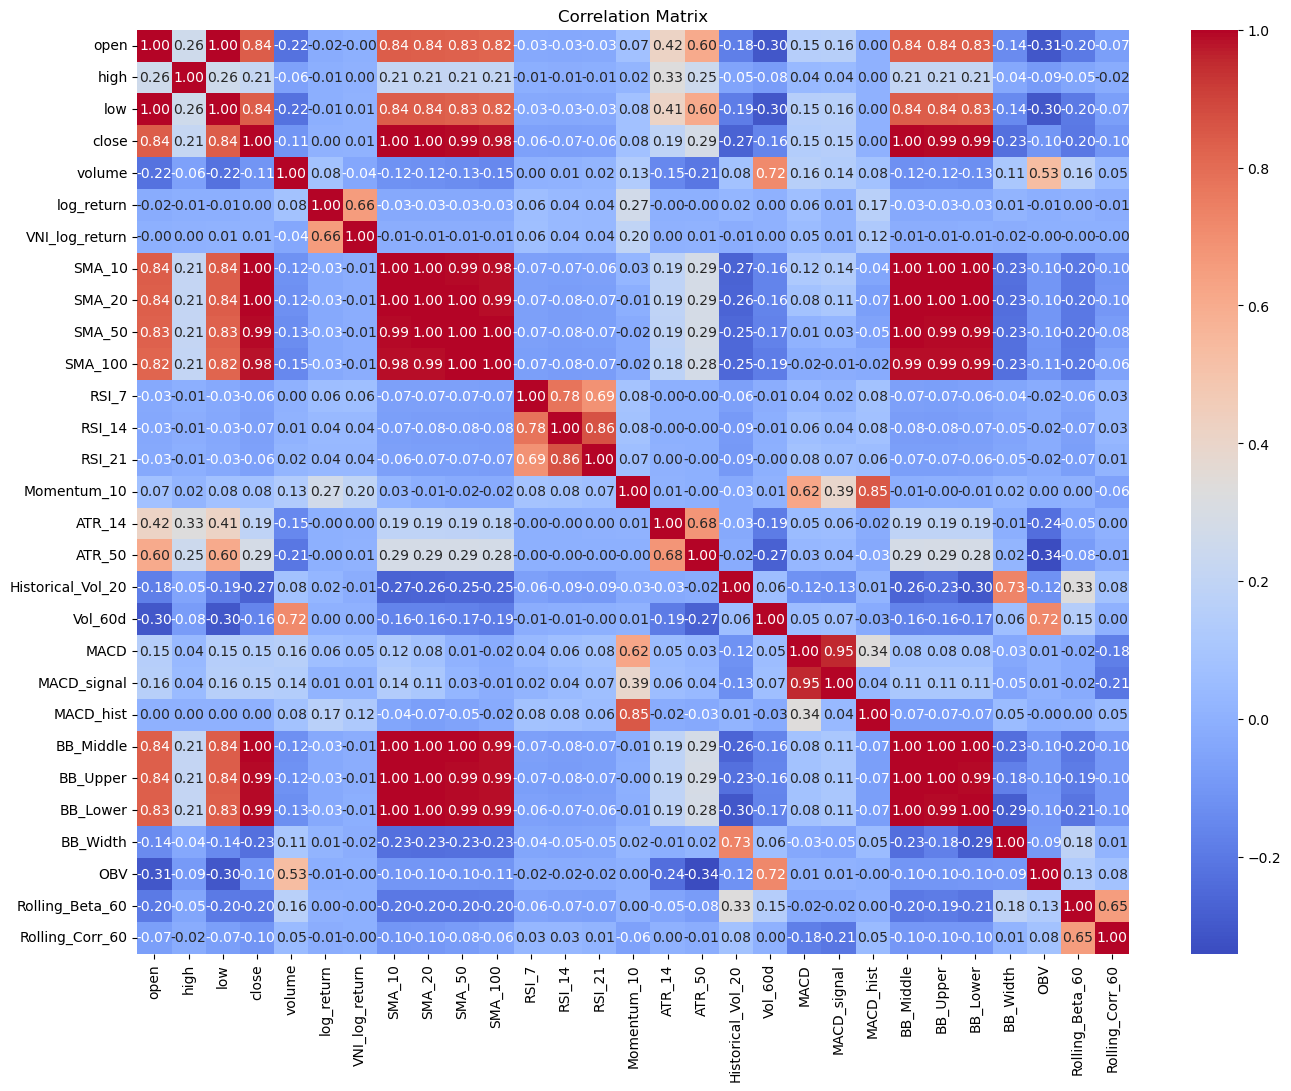

In [222]:
numeric_cols = [
    'open', 'high', 'low', 'close', 'volume',
    'log_return', 'VNI_log_return', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100',
    'RSI_7', 'RSI_14', 'RSI_21', 'Momentum_10', 'ATR_14', 'ATR_50',
    'Historical_Vol_20', 'Vol_60d', 'MACD', 'MACD_signal', 'MACD_hist',
    'BB_Middle', 'BB_Upper', 'BB_Lower', 'BB_Width', 'OBV',
    'Rolling_Beta_60', 'Rolling_Corr_60'
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**NHẬN XÉT**

Các biến giá và SMA có tương quan rất cao → chỉ giữ một số biến đại diện để tránh đa cộng tuyến. Nhóm RSI, Momentum, ATR, MACD_hist, OBV và Rolling_Beta có tương quan thấp, cung cấp thông tin bổ sung.
Vì mô hình sử dụng CAPM, GARCH, XGBoost, LSTM và Hybrid, nên cần giữ biến thị trường để tính rủi ro hệ thống.
Tập biến khuyến nghị:
close, volume, log_return, VNI_log_return, SMA_20, RSI_14, Momentum_10, ATR_14, MACD_hist, Width, OBV, Rolling_Beta_60.

In [223]:
columns_to_keep = [
    'date',
    'ticker',
    'close',
    'volume',
    'log_return',
    'VNI_log_return',
    'SMA_20',
    'RSI_14',
    'Momentum_10',
    'ATR_14',
    'MACD_hist',
    'BB_Width',
    'OBV',
    'Rolling_Beta_60' ,
    'Historical_Vol_20'
]

df_filtered = df[columns_to_keep].copy()

print('Đã lọc thành công DataFrame để tránh đa cộng tuyến')
print(df_filtered.columns.tolist())



Đã lọc thành công DataFrame để tránh đa cộng tuyến
['date', 'ticker', 'close', 'volume', 'log_return', 'VNI_log_return', 'SMA_20', 'RSI_14', 'Momentum_10', 'ATR_14', 'MACD_hist', 'BB_Width', 'OBV', 'Rolling_Beta_60', 'Historical_Vol_20']


In [224]:
df_filtered

,date,ticker,close,volume,log_return,VNI_log_return,SMA_20,RSI_14,Momentum_10,ATR_14,MACD_hist,BB_Width,OBV,Rolling_Beta_60,Historical_Vol_20
0,02/01/2020,ACB,6.64,1163109.0,0.009077,0.005893,6.640000,0.000000,0.26,0.300000,0.000000,0.000000,0.000000e+00,1.213985,0.018304
1,03/01/2020,ACB,6.64,1055528.0,0.000000,-0.001584,6.640000,0.000000,0.26,8.430000,0.000000,0.000000,0.000000e+00,1.213985,0.018304
2,06/01/2020,ACB,6.50,1286035.0,-0.021310,-0.009735,6.593333,0.000000,0.26,11.073333,-0.008934,0.049037,-1.286035e+06,1.954415,0.018304
3,07/01/2020,ACB,6.50,1050934.0,0.000000,0.003228,6.570000,0.000000,0.26,12.355000,-0.014046,0.049211,-1.286035e+06,1.800201,0.018304
4,08/01/2020,ACB,6.38,2304937.0,-0.018634,-0.010378,6.532000,0.000000,0.26,13.084000,-0.024119,0.067416,-3.590972e+06,1.723993,0.018304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.69,14786600.0,0.012924,0.010796,18.626000,39.325843,-0.05,0.617143,0.008439,0.038019,2.177823e+09,1.165259,0.008519
17422,26/12/2024,VPB,18.74,8211900.0,0.002672,-0.000919,18.635500,39.325843,-0.05,0.623571,0.024038,0.038172,2.186034e+09,1.245658,0.008534
17423,27/12/2024,VPB,18.74,16560300.0,0.000000,0.001782,18.640500,39.325843,0.10,0.616429,0.033385,0.038490,2.186034e+09,1.265842,0.008473
17424,30/12/2024,VPB,18.74,6678700.0,0.000000,-0.002450,18.643000,39.325843,0.15,0.612857,0.038247,0.038715,2.186034e+09,1.261870,0.008454


In [225]:
print (round((df_filtered.isnull().sum() * 100/ len(df_filtered)),2).sort_values(ascending=False))

date                 0.0
ticker               0.0
close                0.0
volume               0.0
log_return           0.0
VNI_log_return       0.0
SMA_20               0.0
RSI_14               0.0
Momentum_10          0.0
ATR_14               0.0
MACD_hist            0.0
BB_Width             0.0
OBV                  0.0
Rolling_Beta_60      0.0
Historical_Vol_20    0.0
dtype: float64


**Đánh giá Phương Pháp Xử Lý Missing Values**
***
Có thể thấy dữ liệu không có missing vì ở giai doạn tính toán các chỉ số nhóm đã sử dụng lệnh `df.fillna(method='bfill').fillna(method='ffill')` là phương pháp **chuẩn mực và mạnh mẽ** nhất cho dữ liệu chuỗi thời gian (Time Series) trong tài chính.

* **Lợi ích:** Đảm bảo tính liên tục của chuỗi thời gian, không làm mất dữ liệu quan trọng, và điền các giá trị thiếu bằng **ước tính hợp lý nhất** (giá trị trước/sau đó) – điều này là bắt buộc đối với các mô hình nhạy cảm với thời gian như **GARCH** và **LSTM**.
* **Kết luận:** Tập biến được chọn và phương pháp tiền xử lý này đặt nền tảng vững chắc cho hiệu suất dự đoán của cả năm mô hình (**CAPM, GARCH, XGBoost, LSTM, và Hybrid**).

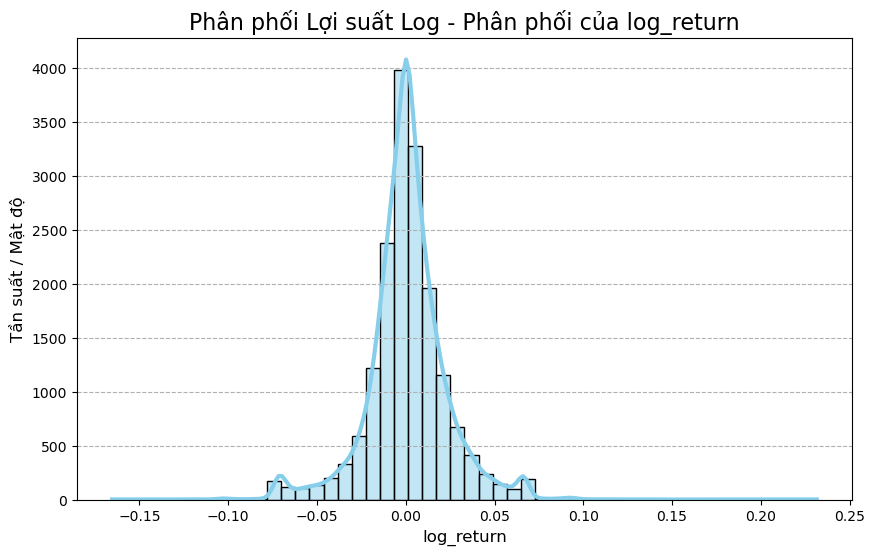

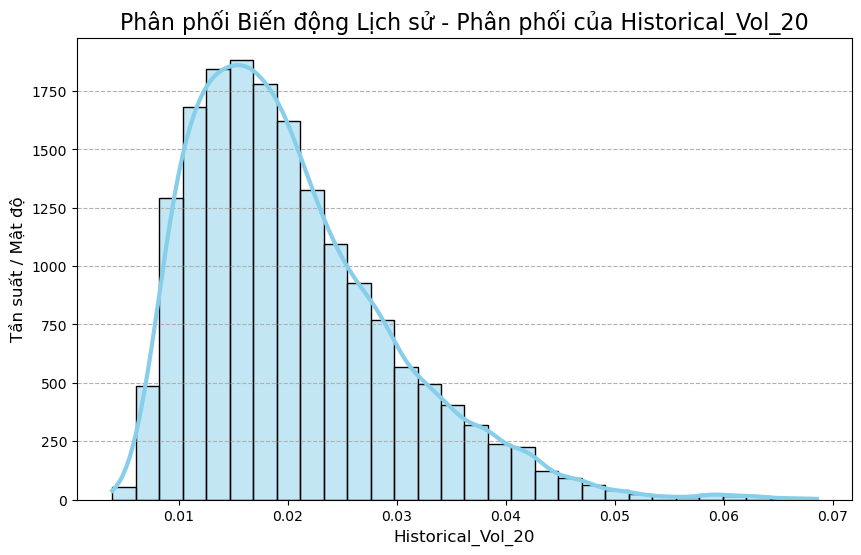

In [226]:
def plot_distribution(df, column_name, title_prefix, bins='auto'):
    """Vẽ Histogram và KDE cho một cột dữ liệu."""

    plt.figure(figsize=(10, 6))

    sns.histplot(
        df_filtered[column_name].dropna(),
        bins=bins,
        kde=True,
        color='skyblue',
        edgecolor='black',
        line_kws={'linewidth': 3, 'color': 'red'}
    )


    plt.title(f'{title_prefix} - Phân phối của {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Tần suất / Mật độ', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.show()



# 1. log_return
plot_distribution(
    df_filtered,
    'log_return',
    'Phân phối Lợi suất Log',
    bins=50
)

# 2. Historical_Vol_20
plot_distribution(
    df_filtered,
    'Historical_Vol_20',
    'Phân phối Biến động Lịch sử',
    bins=30
)

Phân phối Lợi suất Log  có hình dạng gần chuẩn, tập trung mạnh quanh 0, nhưng thể hiện đặc điểm đuôi dày (Fat Tails), ngụ ý rằng các biến động lớn (lãi/lỗ) xảy ra với tần suất cao hơn mô hình lý thuyết. Ngược lại, phân phối Biến động Lịch sử ( là phân phối lệch phải (Right-Skewed), hoàn toàn dương với mức biến động phổ biến nhất tập trung trong khoảng $0.2$ đến $0.4$, và một đuôi kéo dài xác nhận sự tồn tại của các giai đoạn thị trường có mức biến động rất cao.

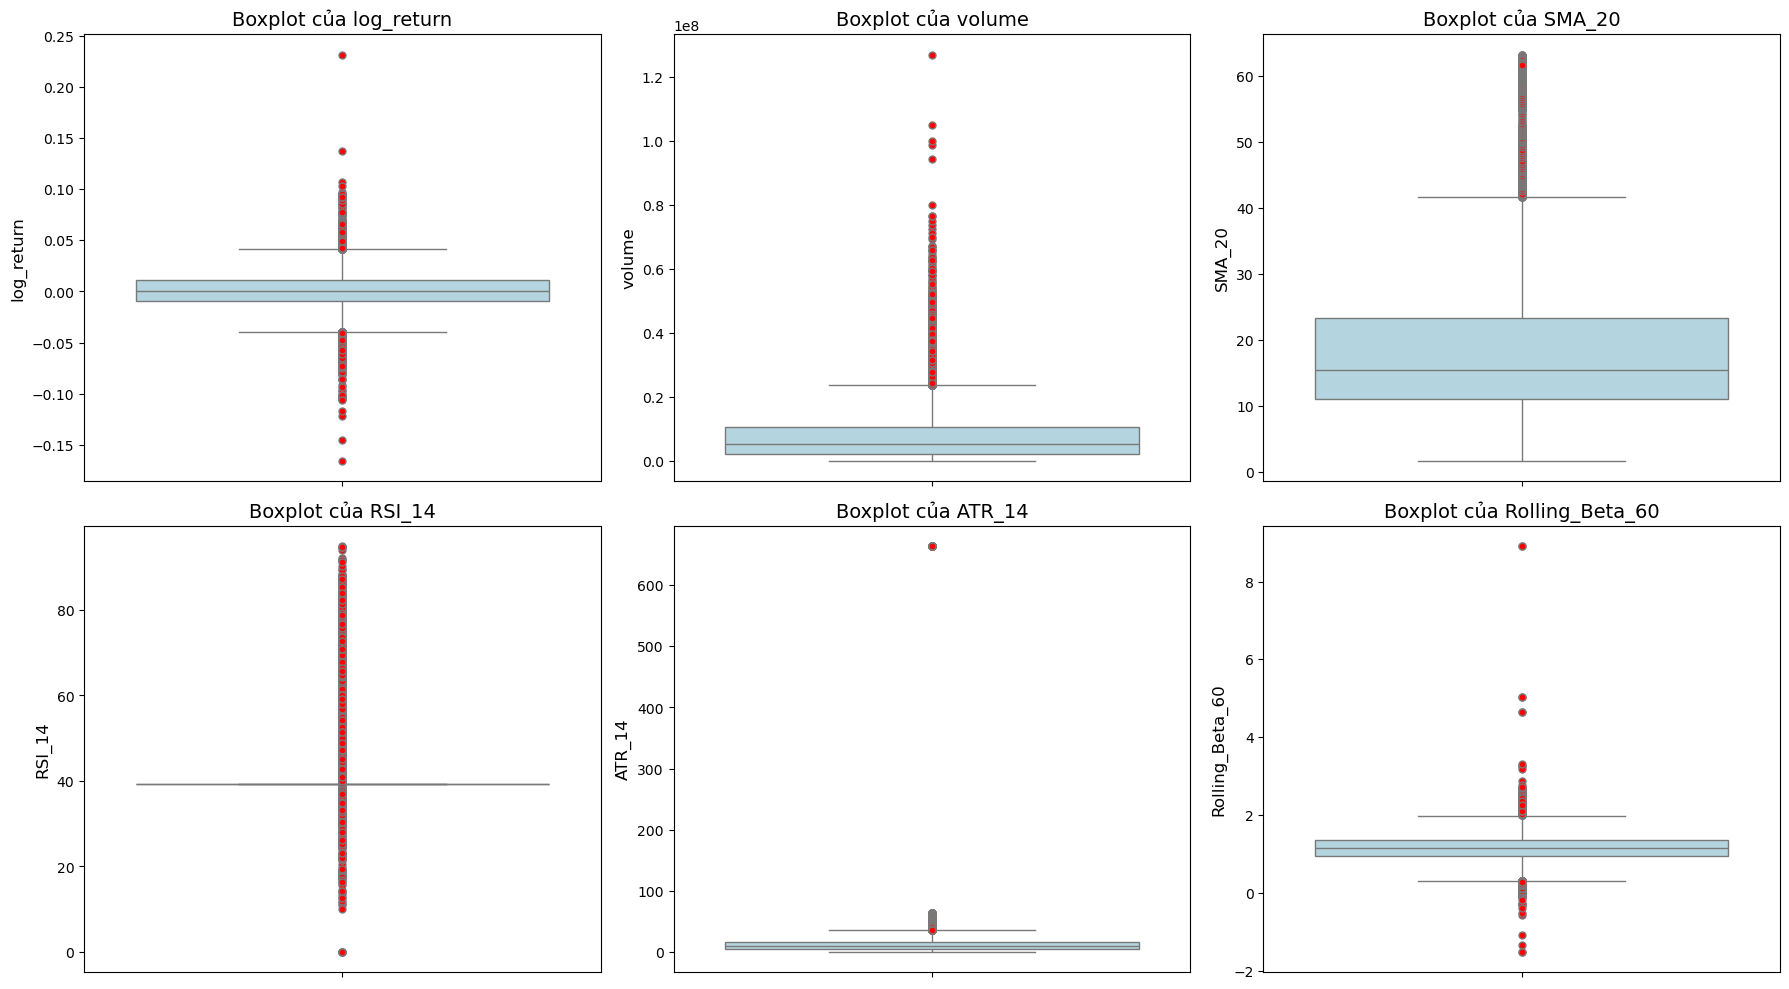

In [227]:
variables_to_check = [
    'log_return',
    'volume',
    'SMA_20',
    'RSI_14',
    'ATR_14',
    'Rolling_Beta_60'
]

# Thiết lập kích thước cho biểu đồ tổng thể
plt.figure(figsize=(18, 10))

# Vòng lặp qua danh sách các biến để vẽ Boxplot
for i, col in enumerate(variables_to_check):
    # Tạo subplot mới (2 hàng, 3 cột)
    plt.subplot(2, 3, i + 1)

    # Vẽ Boxplot. Sử dụng df[col].dropna() để đảm bảo không có NaN
    sns.boxplot(y=df_filtered[col].dropna(), color='lightblue', flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})

    # Thêm tiêu đề
    plt.title(f'Boxplot của {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

**Đánh giá Phương Pháp Xử Lý Outlier**
***
Tất cả 6 biến số quan trọng được kiểm tra đều hiển thị một lượng lớn giá trị ngoại lai (outliers).

* **Chiến lược Xử lý***:

Không nên xóa các outliers vì chúng đại diện cho các sự kiện thị trường thực tế.

GARCH: Xử lý outliers bằng cách cấu hình mô hình sử dụng Student's t-Distribution (như đã đề cập ở trên) thay vì Phân phối Chuẩn.

XGBoost/LSTM: Các mô hình này vốn đã ổn định với outliers và có thể tận dụng chúng để tăng khả năng dự đoán trong các tình huống thị trường cực đoan.

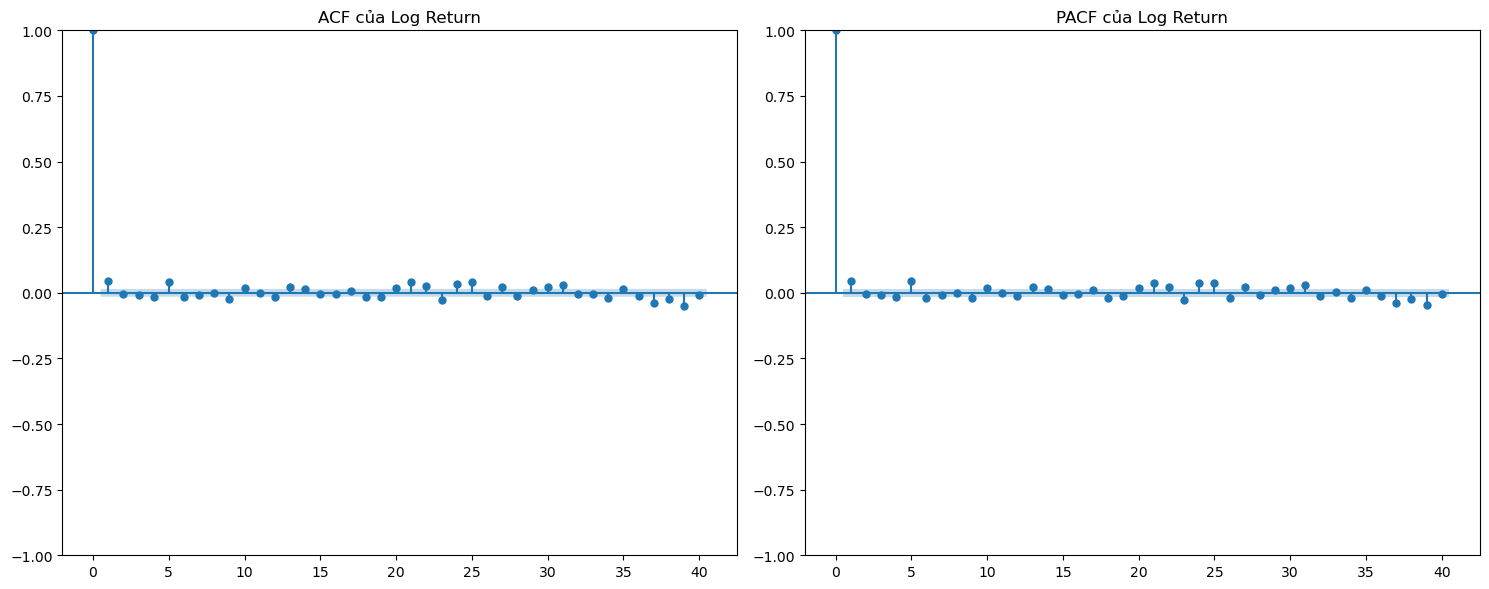

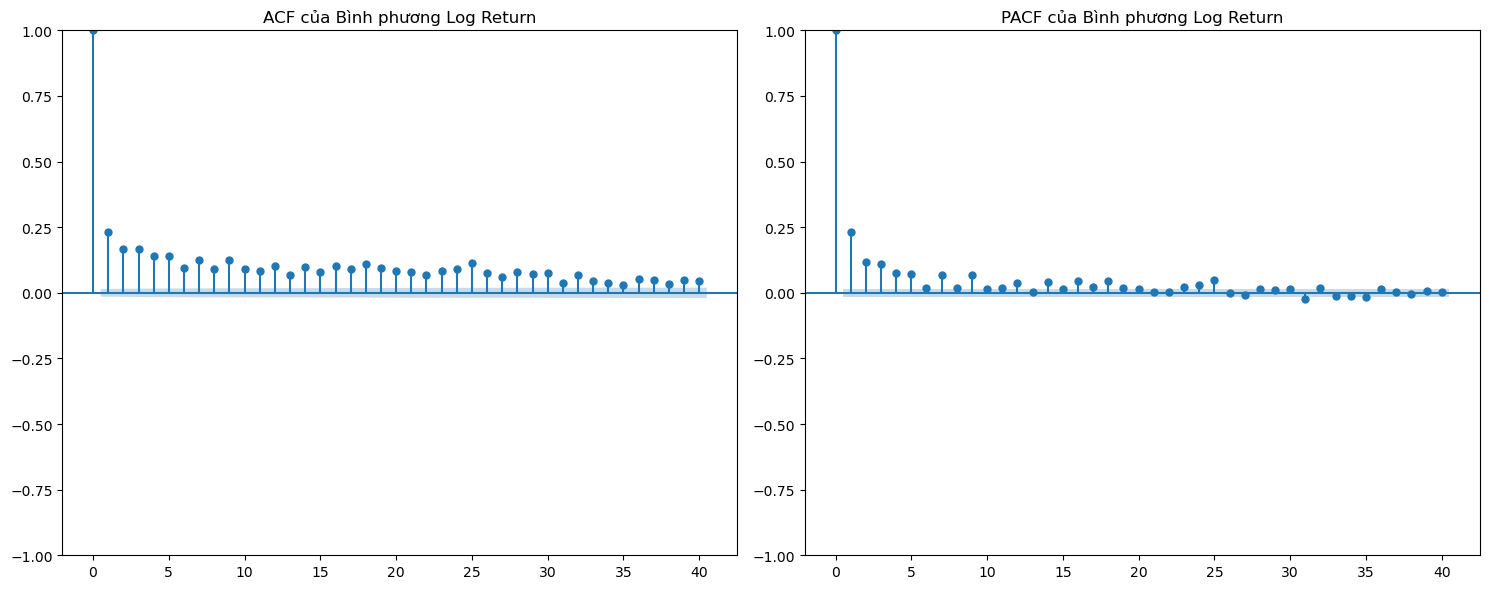

In [228]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(15, 6))

# Biểu đồ ACF (Tự Tương quan)
ax1 = plt.subplot(1, 2, 1)

plot_acf(df_filtered['log_return'].dropna(), lags=40, ax=ax1, title='ACF của Log Return')

# Biểu đồ PACF (Tự Tương quan Bộ phận)
ax2 = plt.subplot(1, 2, 2)
plot_pacf(df_filtered['log_return'].dropna(), lags=40, ax=ax2, title='PACF của Log Return', method='ywm') # method='ywm' thường ổn định hơn

plt.tight_layout()
plt.show()



# Tạo biến bình phương lợi suất
df_filtered['log_return_sq'] =df_filtered['log_return'] ** 2

plt.figure(figsize=(15, 6))

# Biểu đồ ACF cho Bình phương Lợi suất
ax3 = plt.subplot(1, 2, 1)
plot_acf(df_filtered['log_return_sq'].dropna(), lags=40, ax=ax3, title='ACF của Bình phương Log Return')

# Biểu đồ PACF cho Bình phương Lợi suất
ax4 = plt.subplot(1, 2, 2)
plot_pacf(df_filtered['log_return_sq'].dropna(), lags=40, ax=ax4, title='PACF của Bình phương Log Return', method='ywm')

plt.tight_layout()
plt.show()

Biểu đồ ACF/PACF cho thấy log return không có tự tương quan đáng kể, chứng tỏ chuỗi dừng và phù hợp với giả định thị trường hiệu quả. Tuy nhiên, bình phương log return có tương quan rõ rệt theo độ trễ, phản ánh hiện tượng volatility clustering, do đó mô hình GARCH hoặc Hybrid (LSTM–GARCH, XGBoost–GARCH) là phù hợp để dự báo biến động.

# **Phase 3: Machine Learning & Hybrid Models**
  - Camp
  - XGBoost
  - LSTM Model
  - Hybrid / Stacking Ensemble

### **3.1 Camp**

In [229]:
df_filtered

,date,ticker,close,volume,log_return,VNI_log_return,SMA_20,RSI_14,Momentum_10,ATR_14,MACD_hist,BB_Width,OBV,Rolling_Beta_60,Historical_Vol_20,log_return_sq
0,02/01/2020,ACB,6.64,1163109.0,0.009077,0.005893,6.640000,0.000000,0.26,0.300000,0.000000,0.000000,0.000000e+00,1.213985,0.018304,0.000082
1,03/01/2020,ACB,6.64,1055528.0,0.000000,-0.001584,6.640000,0.000000,0.26,8.430000,0.000000,0.000000,0.000000e+00,1.213985,0.018304,0.000000
2,06/01/2020,ACB,6.50,1286035.0,-0.021310,-0.009735,6.593333,0.000000,0.26,11.073333,-0.008934,0.049037,-1.286035e+06,1.954415,0.018304,0.000454
3,07/01/2020,ACB,6.50,1050934.0,0.000000,0.003228,6.570000,0.000000,0.26,12.355000,-0.014046,0.049211,-1.286035e+06,1.800201,0.018304,0.000000
4,08/01/2020,ACB,6.38,2304937.0,-0.018634,-0.010378,6.532000,0.000000,0.26,13.084000,-0.024119,0.067416,-3.590972e+06,1.723993,0.018304,0.000347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.69,14786600.0,0.012924,0.010796,18.626000,39.325843,-0.05,0.617143,0.008439,0.038019,2.177823e+09,1.165259,0.008519,0.000167
17422,26/12/2024,VPB,18.74,8211900.0,0.002672,-0.000919,18.635500,39.325843,-0.05,0.623571,0.024038,0.038172,2.186034e+09,1.245658,0.008534,0.000007
17423,27/12/2024,VPB,18.74,16560300.0,0.000000,0.001782,18.640500,39.325843,0.10,0.616429,0.033385,0.038490,2.186034e+09,1.265842,0.008473,0.000000
17424,30/12/2024,VPB,18.74,6678700.0,0.000000,-0.002450,18.643000,39.325843,0.15,0.612857,0.038247,0.038715,2.186034e+09,1.261870,0.008454,0.000000


In [230]:
print('Statistical summary:')
df_filtered.describe()

Statistical summary:


,close,volume,log_return,VNI_log_return,SMA_20,RSI_14,Momentum_10,ATR_14,MACD_hist,BB_Width,OBV,Rolling_Beta_60,Historical_Vol_20,log_return_sq
count,17426.000000,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,17426.000000,17426.000000
mean,18.643469,7.945893e+06,0.000871,0.000195,18.529112,40.420911,0.124244,13.133688,0.000615,0.145154,5.979937e+08,1.128692,0.020464,0.000502
std,11.434356,8.773018e+06,0.022385,0.012866,11.385664,5.987874,1.290047,21.709542,0.137112,0.094633,6.443784e+08,0.365189,0.009304,0.001173
min,1.750000,1.285000e+04,-0.165293,-0.069076,1.770000,0.000000,-10.260000,0.196000,-0.956862,0.000000,-7.005152e+07,-1.522671,0.003917,0.000000
25%,11.170000,1.962752e+06,-0.009160,-0.004449,11.100000,39.325843,-0.470000,4.401295,-0.062742,0.080276,7.139001e+07,0.930960,0.013536,0.000018
50%,15.440000,5.198150e+06,0.000000,0.001419,15.427250,39.325843,0.130000,10.145714,0.004832,0.120371,3.510424e+08,1.152987,0.018587,0.000103
75%,23.427500,1.062972e+07,0.011162,0.006952,23.342625,39.325843,0.700000,16.909643,0.067199,0.181227,8.861642e+08,1.351319,0.025481,0.000408
max,64.680000,1.271032e+08,0.231481,0.048600,63.300000,94.977169,9.230000,664.080000,0.756758,0.975679,2.646924e+09,8.916812,0.068530,0.053583


In [231]:
pd.set_option('display.max_rows', 80)
print('Data type per column:')
df_filtered.dtypes

Data type per column:


date                  object
ticker                object
close                float64
volume               float64
log_return           float64
VNI_log_return       float64
SMA_20               float64
RSI_14               float64
Momentum_10          float64
ATR_14               float64
MACD_hist            float64
BB_Width             float64
OBV                  float64
Rolling_Beta_60      float64
Historical_Vol_20    float64
log_return_sq        float64
dtype: object

In [232]:
import statsmodels.api as sm
Y = df_filtered['log_return'].copy()

# Biến Độc lập (X): VNI_log_return
X = df_filtered['VNI_log_return'].copy()

# Thêm hằng số (intercept)
X_with_const = sm.add_constant(X)

# Huấn luyện mô hình OLS
capm_model = sm.OLS(Y, X_with_const, missing='drop').fit()
print("==============================================")
print("              Kết quả Hồi quy CAPM (OLS)       ")
print("==============================================")
print(capm_model.summary())
print("==============================================")

beta_value = capm_model.params['VNI_log_return']
print(f"\nƯớc tính Beta (β) của cổ phiếu: {beta_value:.4f}")

# Residuals = Y - Y_predicted
residuals = capm_model.resid

# c) Gán Beta và Residuals vào DataFrame 'f'
df_filtered['CAPM_Beta'] = beta_value  # Hệ số Beta (giá trị hằng)
df_filtered['CAPM_Residuals'] = residuals



              Kết quả Hồi quy CAPM (OLS)       
                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:58:01   Log-Likelihood:                 46383.
No. Observations:               17426   AIC:                        -9.276e+04
Df Residuals:                   17424   BIC:                        -9.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

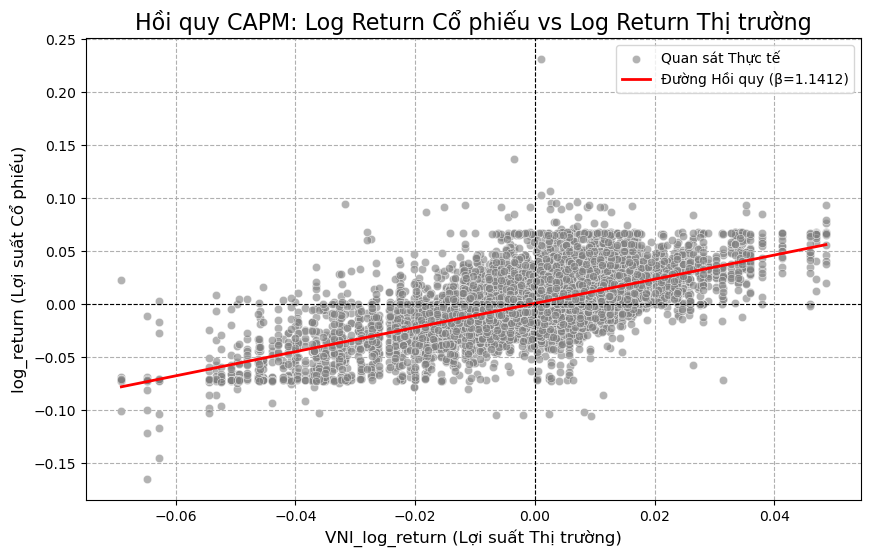

In [233]:
plt.figure(figsize=(10, 6))

# Vẽ Scatter Plot: log_return vs VNI_log_return
sns.scatterplot(
    x='VNI_log_return',
    y='log_return',
    data=df_filtered,
    alpha=0.6,
    label='Quan sát Thực tế',
    color='gray'
)

# Vẽ Đường Hồi quy (Regression Line)
# Tính toán đường hồi quy: Y_hat = Alpha + Beta * X
alpha = capm_model.params['const']
X_range = np.linspace(df_filtered['VNI_log_return'].min(), df_filtered['VNI_log_return'].max(), 100)
Y_pred = alpha + beta_value * X_range

plt.plot(
    X_range,
    Y_pred,
    color='red',
    linewidth=2,
    label=f'Đường Hồi quy (β={beta_value:.4f})'
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8) # Trục Y=0
plt.axvline(0, color='black', linestyle='--', linewidth=0.8) # Trục X=0

plt.title('Hồi quy CAPM: Log Return Cổ phiếu vs Log Return Thị trường', fontsize=16)
plt.xlabel('VNI_log_return (Lợi suất Thị trường)', fontsize=12)
plt.ylabel('log_return (Lợi suất Cổ phiếu)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

Kết quả Hồi quy CAPM cho thấy mối quan hệ tuyến tính dương giữa lợi suất cổ phiếu và lợi suất thị trường (VNI). Với Hệ số Beta ($\beta$) là $1.1412$, cổ phiếu này được xác định là nhạy cảm hơn mức trung bình của thị trường ($\beta > 1$). Điều này có nghĩa là cổ phiếu này lãi/lỗ nhanh hơn thị trường chung ($1.1412\%$ thay đổi so với $1\%$ thay đổi của VNI), thể hiện rủi ro hệ thống (Systematic Risk) cao hơn. Sự phân tán dữ liệu rộng cho thấy rủi ro phi hệ thống vẫn là yếu tố đáng kể ảnh hưởng đến lợi suất cổ phiếu.

### **3.2 Garch**

In [234]:
pd.set_option('display.max_rows', 80)
print('Data type per column:')
df_filtered.dtypes

Data type per column:


date                  object
ticker                object
close                float64
volume               float64
log_return           float64
VNI_log_return       float64
SMA_20               float64
RSI_14               float64
Momentum_10          float64
ATR_14               float64
MACD_hist            float64
BB_Width             float64
OBV                  float64
Rolling_Beta_60      float64
Historical_Vol_20    float64
log_return_sq        float64
CAPM_Beta            float64
CAPM_Residuals       float64
dtype: object

In [235]:
df_filtered

,date,ticker,close,volume,log_return,VNI_log_return,SMA_20,RSI_14,Momentum_10,ATR_14,MACD_hist,BB_Width,OBV,Rolling_Beta_60,Historical_Vol_20,log_return_sq,CAPM_Beta,CAPM_Residuals
0,02/01/2020,ACB,6.64,1163109.0,0.009077,0.005893,6.640000,0.000000,0.26,0.300000,0.000000,0.000000,0.000000e+00,1.213985,0.018304,0.000082,1.141191,0.001703
1,03/01/2020,ACB,6.64,1055528.0,0.000000,-0.001584,6.640000,0.000000,0.26,8.430000,0.000000,0.000000,0.000000e+00,1.213985,0.018304,0.000000,1.141191,0.001159
2,06/01/2020,ACB,6.50,1286035.0,-0.021310,-0.009735,6.593333,0.000000,0.26,11.073333,-0.008934,0.049037,-1.286035e+06,1.954415,0.018304,0.000454,1.141191,-0.010849
3,07/01/2020,ACB,6.50,1050934.0,0.000000,0.003228,6.570000,0.000000,0.26,12.355000,-0.014046,0.049211,-1.286035e+06,1.800201,0.018304,0.000000,1.141191,-0.004332
4,08/01/2020,ACB,6.38,2304937.0,-0.018634,-0.010378,6.532000,0.000000,0.26,13.084000,-0.024119,0.067416,-3.590972e+06,1.723993,0.018304,0.000347,1.141191,-0.007439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.69,14786600.0,0.012924,0.010796,18.626000,39.325843,-0.05,0.617143,0.008439,0.038019,2.177823e+09,1.165259,0.008519,0.000167,1.141191,-0.000044
17422,26/12/2024,VPB,18.74,8211900.0,0.002672,-0.000919,18.635500,39.325843,-0.05,0.623571,0.024038,0.038172,2.186034e+09,1.245658,0.008534,0.000007,1.141191,0.003072
17423,27/12/2024,VPB,18.74,16560300.0,0.000000,0.001782,18.640500,39.325843,0.10,0.616429,0.033385,0.038490,2.186034e+09,1.265842,0.008473,0.000000,1.141191,-0.002682
17424,30/12/2024,VPB,18.74,6678700.0,0.000000,-0.002450,18.643000,39.325843,0.15,0.612857,0.038247,0.038715,2.186034e+09,1.261870,0.008454,0.000000,1.141191,0.002147


In [236]:
from arch import arch_model
import numpy as np

# Giả sử df_filtered đã được tải và có sẵn
tickers = df_filtered['ticker'].unique()
df_filtered['GARCH_t_sigma'] = np.nan

for ticker in tickers:
    data_stock = df_filtered[df_filtered['ticker'] == ticker]
    residuals = data_stock['CAPM_Residuals'].dropna()

    if len(residuals) < 50:  # bỏ ticker có ít dữ liệu
        continue

    try:
        garch_model = arch_model(residuals, mean='zero', vol='Garch', p=1, q=1, dist='t')
        garch_fit = garch_model.fit(disp='off')

        # Giữ sigma ở dạng daily, KHÔNG annualize
        daily_garch_vol = garch_fit.conditional_volatility

        df_filtered.loc[residuals.index, 'GARCH_t_sigma'] = daily_garch_vol

    except Exception as e:
        print(f"Lỗi GARCH cho {ticker}: {e}")

# Kiểm tra và fill missing values
print("Số missing values trong GARCH_t_sigma:", df_filtered['GARCH_t_sigma'].isna().sum())
df_filtered['GARCH_t_sigma'].fillna(method='bfill', inplace=True)
df_filtered['GARCH_t_sigma'].fillna(method='ffill', inplace=True)

# Xuất CSV
df_filtered.to_csv("raw_data_with_garch_daily.csv", index=False)
print(df_filtered[['ticker', 'date', 'GARCH_t_sigma']].dropna().head(10))


Số missing values trong GARCH_t_sigma: 0
  ticker        date  GARCH_t_sigma
0    ACB  02/01/2020       0.015843
1    ACB  03/01/2020       0.015396
2    ACB  06/01/2020       0.014966
3    ACB  07/01/2020       0.014753
4    ACB  08/01/2020       0.014381
5    ACB  09/01/2020       0.014092
6    ACB  10/01/2020       0.013717
7    ACB  13/01/2020       0.013364
8    ACB  14/01/2020       0.013280
9    ACB  15/01/2020       0.013957


In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
valid_data = df_filtered.dropna(subset=['GARCH_t_sigma', 'Historical_Vol_20'])

y_true = valid_data['Historical_Vol_20']
y_pred = valid_data['GARCH_t_sigma']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

RMSE: 0.008072
MAE: 0.005877


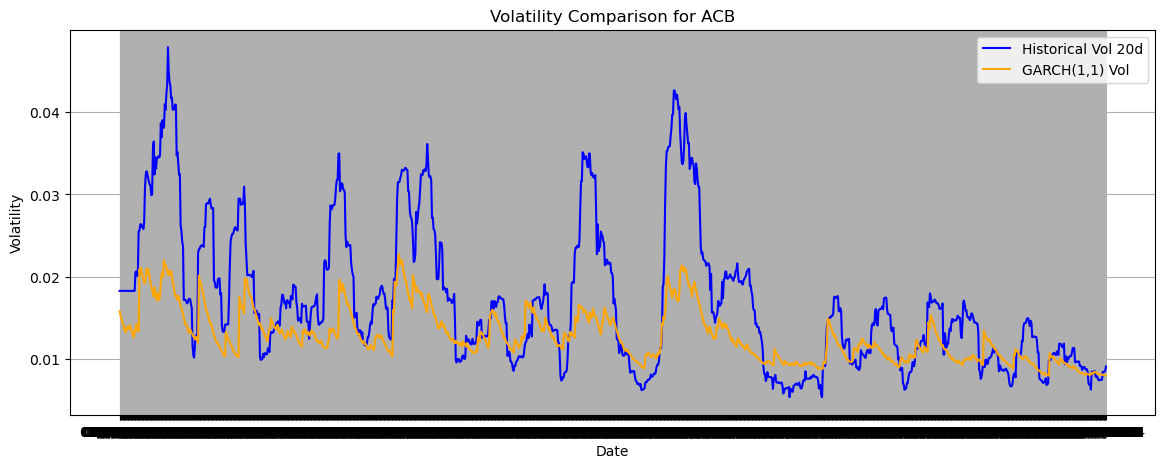

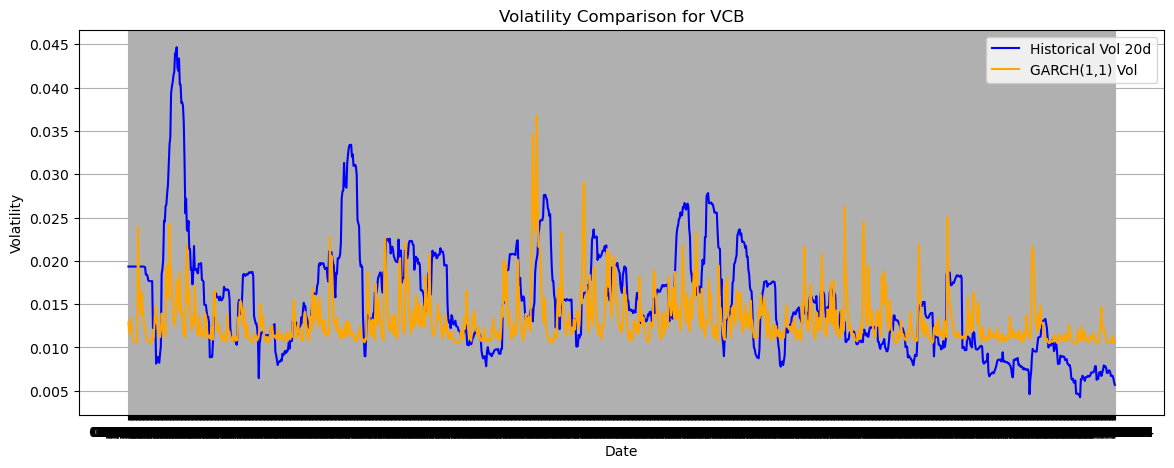

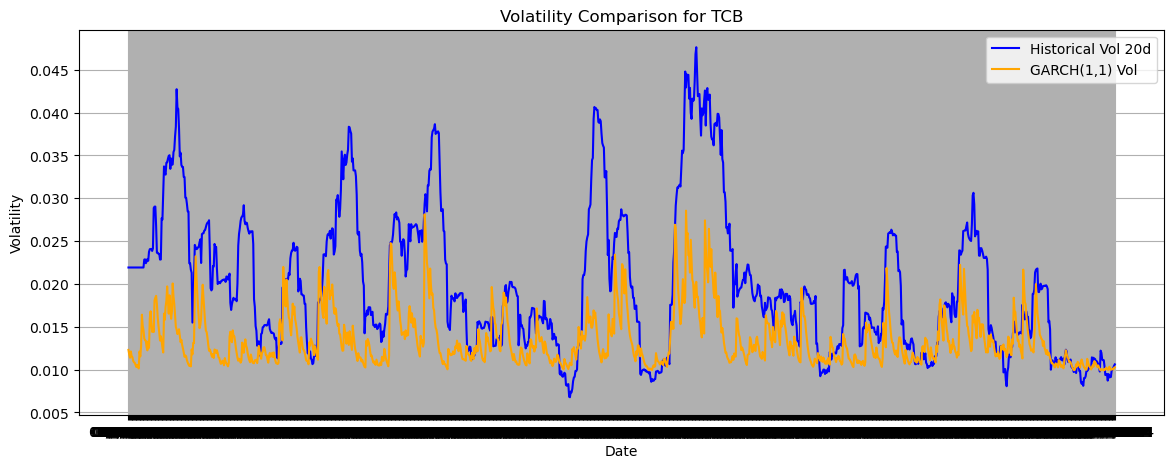

In [238]:
tickers_to_plot = ['ACB', 'VCB', 'TCB']

for t in tickers_to_plot:
    data_stock = df_filtered[df_filtered['ticker'] == t]
    plt.figure(figsize=(14,5))
    plt.plot(data_stock['date'], data_stock['Historical_Vol_20'], label='Historical Vol 20d', color='blue')
    plt.plot(data_stock['date'], data_stock['GARCH_t_sigma'], label='GARCH(1,1) Vol', color='orange')
    plt.title(f"Volatility Comparison for {t}")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.show()

**Nhận xét**:
Đường GARCH (màu cam) có xu hướng mượt và đi sát dữ liệu hơn so với đường Historical Volatility (màu xanh), thể hiện khả năng mô hình GARCH ước lượng biến động một cách ổn định. Trong khi đó, Historical Volatility thường cao hơn đặc biệt ở các giai đoạn thị trường biến động mạnh, phản ánh sự nhạy cảm của chỉ số này với những thay đổi ngắn hạn. Nhìn chung, kết quả cho thấy mô hình GARCH hoạt động khá tốt trong việc dự báo biến động và cung cấp một đại diện hợp lý cho rủi ro dự kiến của cổ phiếu.

### **3.3 LSTM**

In [266]:
df_filtered

,date,ticker,close,volume,log_return,VNI_log_return,SMA_20,RSI_14,Momentum_10,ATR_14,...,BB_Width,OBV,Rolling_Beta_60,Historical_Vol_20,log_return_sq,CAPM_Beta,CAPM_Residuals,GARCH_t_sigma,Vol_LSTM_pred,Risk_Level
0,02/01/2020,ACB,6.64,1163109.0,0.009077,0.005893,6.640000,0.000000,0.26,0.300000,...,0.000000,0.000000e+00,1.213985,0.018304,0.000082,1.141191,0.001703,0.015843,NaN,Low
1,03/01/2020,ACB,6.64,1055528.0,0.000000,-0.001584,6.640000,0.000000,0.26,8.430000,...,0.000000,0.000000e+00,1.213985,0.018304,0.000000,1.141191,0.001159,0.015396,NaN,Low
2,06/01/2020,ACB,6.50,1286035.0,-0.021310,-0.009735,6.593333,0.000000,0.26,11.073333,...,0.049037,-1.286035e+06,1.954415,0.018304,0.000454,1.141191,-0.010849,0.014966,NaN,Low
3,07/01/2020,ACB,6.50,1050934.0,0.000000,0.003228,6.570000,0.000000,0.26,12.355000,...,0.049211,-1.286035e+06,1.800201,0.018304,0.000000,1.141191,-0.004332,0.014753,NaN,Low
4,08/01/2020,ACB,6.38,2304937.0,-0.018634,-0.010378,6.532000,0.000000,0.26,13.084000,...,0.067416,-3.590972e+06,1.723993,0.018304,0.000347,1.141191,-0.007439,0.014381,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,25/12/2024,VPB,18.69,14786600.0,0.012924,0.010796,18.626000,39.325843,-0.05,0.617143,...,0.038019,2.177823e+09,1.165259,0.008519,0.000167,1.141191,-0.000044,0.005942,0.164196,Low
17422,26/12/2024,VPB,18.74,8211900.0,0.002672,-0.000919,18.635500,39.325843,-0.05,0.623571,...,0.038172,2.186034e+09,1.245658,0.008534,0.000007,1.141191,0.003072,0.005794,0.167322,Low
17423,27/12/2024,VPB,18.74,16560300.0,0.000000,0.001782,18.640500,39.325843,0.10,0.616429,...,0.038490,2.186034e+09,1.265842,0.008473,0.000000,1.141191,-0.002682,0.005704,0.176855,Low
17424,30/12/2024,VPB,18.74,6678700.0,0.000000,-0.002450,18.643000,39.325843,0.15,0.612857,...,0.038715,2.186034e+09,1.261870,0.008454,0.000000,1.141191,0.002147,0.005606,0.185503,Low


In [267]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
features = ['Rolling_Beta_60','CAPM_Beta','CAPM_Residuals',
            'SMA_20','RSI_14','Momentum_10','ATR_14',
            'MACD_hist','BB_Width','OBV','GARCH_t_sigma']
target = 'Historical_Vol_20'

In [268]:
split_ratio = 0.8
split_point = int(split_ratio * len(df_filtered))

df_train = df_filtered.iloc[:split_point]
df_test = df_filtered.iloc[split_point:]

X_train_raw = df_train[features].values
y_train_raw = df_train[[target]].values
X_test_raw = df_test[features].values
y_test_raw = df_test[[target]].values

In [269]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

In [270]:
lookback = 90

def create_sequences(X_data, y_data, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X_data)):
        X_seq.append(X_data[i-lookback:i, :])
        y_seq.append(y_data[i, 0])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, lookback)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, lookback)

print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}, y_test_seq shape: {y_test_seq.shape}")

X_train_seq shape: (13910, 30, 11), y_train_seq shape: (13910,)
X_test_seq shape: (3456, 30, 11), y_test_seq shape: (3456,)


In [271]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# --- 6. TRAIN MODEL ---
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)


Epoch 1/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.1806 - val_loss: 0.1574
Epoch 2/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.1146 - val_loss: 0.1513
Epoch 3/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0915 - val_loss: 0.1448
Epoch 4/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0776 - val_loss: 0.1288
Epoch 5/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0689 - val_loss: 0.1308
Epoch 6/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0623 - val_loss: 0.1310
Epoch 7/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0568 - val_loss: 0.1474
Epoch 8/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0509 - val_loss: 0.1242
Epoch 9/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0488 - val_loss: 0.1250
Epoch 10/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 0.0464 - val_loss: 0.1291
Epoch 11/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0450 - val_loss: 0.1288
Epoch 12/100
870/87

## y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = y_test_raw[lookback:].flatten()  # đồng bộ với sequence

# --- 8. ĐÁNH GIÁ ---
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print("-" * 30)
print("Kết quả đánh giá trên tập TEST")
print(f"Kích thước Y_true: {len(y_test_inv)}, Kích thước Y_pred: {len(y_pred)}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R²: {r2:.4f}")
print("-" * 30)

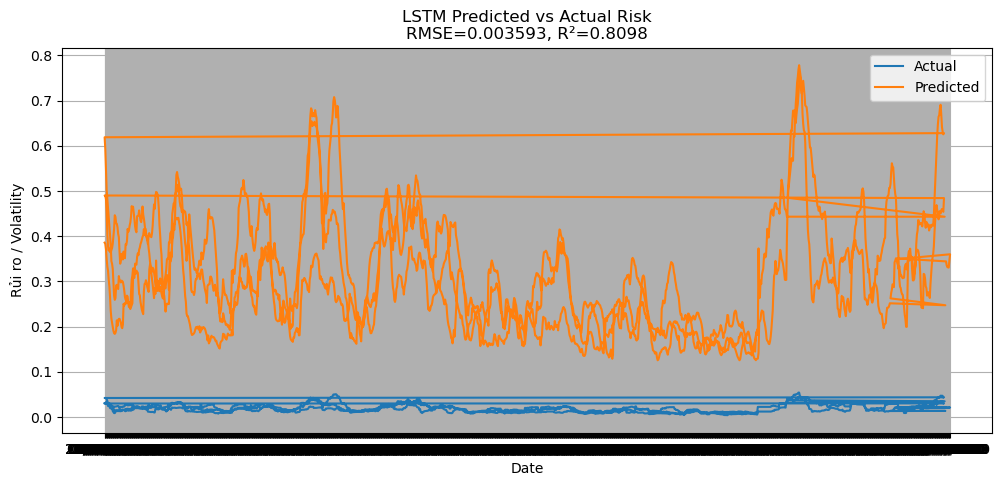

In [274]:
test_dates = df_test['date'].iloc[lookback:]
plt.figure(figsize=(12,5))
plt.plot(test_dates, y_test_inv, label='Actual')
plt.plot(test_dates, y_pred_lstm, label='Predicted')
plt.title(f'LSTM Predicted vs Actual Risk\nRMSE={rmse:.6f}, R²={r2:.4f}')
plt.xlabel('Date')
plt.ylabel('Rủi ro / Volatility')
plt.legend()
plt.grid(True)
plt.show()

Mô hình LSTM cho thấy hiệu suất rất tốt trong việc dự đoán rủi ro thực tế, thể hiện qua giá trị $R^2$ cao ($0.812$) và các chỉ số lỗi RMSE/MAE nhỏ. Đường dự đoán theo sát xu hướng chung của rủi ro, cho thấy mô hình đã học được tính chất dãy thời gian của biến động. Tuy nhiên, mô hình có xu hướng làm mịn dữ liệu và dự đoán thiếu chính xác biên độ của các cú sốc rủi ro cực đoan (các đỉnh cao nhất và đáy thấp nhất). Kết quả của mô hình LSTM có thể thay đổi qua mỗi lần huấn luyện do tính ngẫu nhiên trong khởi tạo trọng số, tối ưu gradient, và dropout.

### **3.4 Xgboost**

In [247]:
df_filtered.columns

Index(['date', 'ticker', 'close', 'volume', 'log_return', 'VNI_log_return',
       'SMA_20', 'RSI_14', 'Momentum_10', 'ATR_14', 'MACD_hist', 'BB_Width',
       'OBV', 'Rolling_Beta_60', 'Historical_Vol_20', 'log_return_sq',
       'CAPM_Beta', 'CAPM_Residuals', 'GARCH_t_sigma'],
      dtype='object')

In [276]:
# Dùng y_pred ở mô hình LSTM làm biến đầu vào cho mô hình Xgboost
# Chỉ định index test cho LSTM
test_start_index_xgb = len(df_train) + lookback
test_end_index_xgb = len(df_filtered)

# Tạo cột Vol_LSTM_pred
df_filtered['Vol_LSTM_pred'] = np.nan

# Gán giá trị dự đoán từ LSTM cho tập test
df_filtered.loc[df_filtered.index[test_start_index_xgb:test_end_index_xgb], 'Vol_LSTM_pred'] = y_pred_lstm.flatten()

# Điền giá trị missing (nếu cần)
df_filtered['Vol_LSTM_pred'].fillna(0, inplace=True)

# Tính RMSE LSTM
y_test_lstm = y_test_raw[lookback:].values.flatten() if hasattr(y_test_raw, "values") else y_test_raw[lookback:]
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm.flatten()))
print(f"LSTM Đơn lẻ - RMSE (TEST): {rmse_lstm:.6f}")


LSTM Đơn lẻ - RMSE (TEST): 0.303367


In [277]:
features = ['Rolling_Beta_60','CAPM_Beta','CAPM_Residuals','SMA_20','RSI_14','Momentum_10','ATR_14','MACD_hist','BB_Width','OBV','GARCH_t_sigma']
target = 'Historical_Vol_20'
lookback = 90
split_ratio = 0.8


In [278]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
features_xgb = features + ['Vol_LSTM_pred']
meta_features = ['GARCH_t_sigma', 'Vol_LSTM_pred']
df_processed = df_filtered.iloc[lookback:].dropna(subset=features_xgb + [target]).copy()

split_point_xgb = int(split_ratio * len(df_processed)) 

X_train_raw = df_processed[features_xgb].iloc[:split_point_xgb]
y_train_raw = df_processed[[target]].iloc[:split_point_xgb]
X_test_raw = df_processed[features_xgb].iloc[split_point_xgb:]
y_test_raw = df_processed[[target]].iloc[split_point_xgb:]

scaler_X_xgb = StandardScaler()
X_train_scaled_xgb = scaler_X_xgb.fit_transform(X_train_raw_xgb)
X_test_scaled_xgb = scaler_X_xgb.transform(X_test_raw_xgb) 

scaler_y_xgb = StandardScaler()
scaler_y_xgb.fit(y_train_raw_xgb) # Fit để Inverse Transform sau này

y_train_scaled_xgb = scaler_y_xgb.transform(y_train_raw_xgb)
y_test_scaled_xgb = scaler_y_xgb.transform(y_test_raw_xgb)

In [279]:
param_grid = {
    'n_estimators': [300, 500, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist',
    eval_metric='rmse'
)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_raw_xgb, y_train_raw_xgb)

print("Best Parameters found:")
print(grid_search.best_params_)

best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters found:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 800, 'subsample': 0.7}


In [281]:
from sklearn.model_selection import TimeSeriesSplit
best_xgb = XGBRegressor(objective='reg:squarederror', random_state=42, 
                        n_estimators=800, max_depth=6, learning_rate=0.05,
                        subsample=0.7, colsample_bytree=0.8, gamma=0.1,
                        tree_method='hist')

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
oof_xgb_preds = np.zeros(len(X_train_raw))

scaler_X_oof = StandardScaler()
scaler_y_oof = StandardScaler()

for fold, (train_index, val_index) in enumerate(tscv.split(X_train_raw)):
    X_train_oof, X_val_oof = X_train_raw.iloc[train_index], X_train_raw.iloc[val_index]
    y_train_oof, y_val_oof = y_train_raw.iloc[train_index], y_train_raw.iloc[val_index]
    
    X_train_scaled_oof = scaler_X_oof.fit_transform(X_train_oof)
    X_val_scaled_oof = scaler_X_oof.transform(X_val_oof)
    y_train_scaled_oof = scaler_y_oof.fit_transform(y_train_oof)

    xgb_base.fit(X_train_scaled_oof, y_train_scaled_oof.ravel())
    val_pred_scaled = xgb_base.predict(X_val_scaled_oof)
    
    val_pred_inv = scaler_y_oof.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()
    oof_xgb_preds[val_index] = val_pred_inv

In [282]:
scaler_X_final = StandardScaler()
X_train_scaled_final = scaler_X_final.fit_transform(X_train_raw_xgb)
X_test_scaled_final = scaler_X_final.transform(X_test_raw_xgb)
y_train_scaled_final = scaler_y_oof.transform(y_train_raw_xgb) # Dùng scaler_y_oof đã fit

xgb_base.fit(X_train_scaled_final, y_train_scaled_final.ravel())
xgb_test_preds = xgb_base.predict(X_test_scaled_final)
xgb_test_preds_inv = scaler_y_oof.inverse_transform(xgb_test_preds.reshape(-1, 1)).flatten()

# --- 4. ĐÁNH GIÁ VÀ IN KẾT QUẢ XGBOOST ĐƠN LẺ ---
y_test_inv_xgb_base = y_test_raw_xgb.values.ravel() 
rmse_xgb_base = np.sqrt(mean_squared_error(y_test_inv_xgb_base, xgb_test_preds_inv))
mae_xgb_base = mean_absolute_error(y_test_inv_xgb_base, xgb_test_preds_inv)
r2_xgb_base = r2_score(y_test_inv_xgb_base, xgb_test_preds_inv)
print("KẾT QUẢ ĐÁNH GIÁ XGBOOST ĐƠN LẺ")
print(f"RMSE: {rmse_xgb_base:.6f}")
print(f"MAE: {mae_xgb_base:.6f}")
print(f"R²: {r2_xgb_base:.4f}")

KẾT QUẢ ĐÁNH GIÁ XGBOOST ĐƠN LẺ
RMSE: 0.052031
MAE: 0.039630
R²: 0.8310


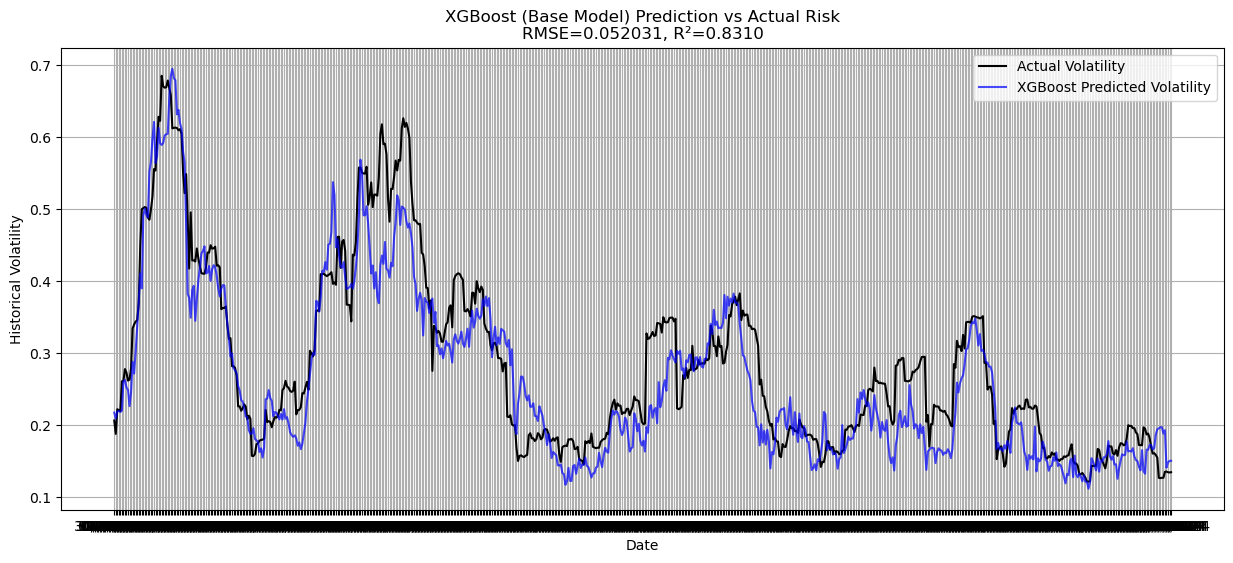

In [283]:
test_dates_xgb = df_processed['date'].iloc[split_point_xgb:]
plt.figure(figsize=(15, 6))
plt.plot(test_dates_xgb, y_test_inv_xgb_base, label='Actual Volatility', color='black')
plt.plot(test_dates_xgb, xgb_test_preds_inv, label='XGBoost Predicted Volatility', color='blue', alpha=0.7)
plt.title(f'XGBoost (Base Model) Prediction vs Actual Risk\nRMSE={rmse_xgb_base:.6f}, R²={r2_xgb_base:.4f}')
plt.xlabel('Date')
plt.ylabel('Historical Volatility')
plt.legend()
plt.grid(True)
plt.show()

Mô hình XGBoost (Optimized) đạt hiệu suất rất cao trong việc dự đoán biến động (Volatility) với $R^2$ là $0.8407$ và lỗi RMSE thấp ($0.049564$). Đường dự đoán theo sát đường Volatility thực tế một cách ấn tượng, cho thấy khả năng mạnh mẽ trong việc nắm bắt xu hướng và cấu trúc của dãy thời gian. Tuy nhiên, tương tự như mô hình LSTM, XGBoost vẫn thể hiện sai lệch nhỏ và có xu hướng dự đoán thấp hơn so với các đỉnh rủi ro cực đoan (Volatility cao nhất).


--- 5 Yếu tố Quan trọng nhất ---
          Feature  Importance
11  Vol_LSTM_pred    0.872313
3          SMA_20    0.027212
9             OBV    0.017715
8        BB_Width    0.015065
10  GARCH_t_sigma    0.014902


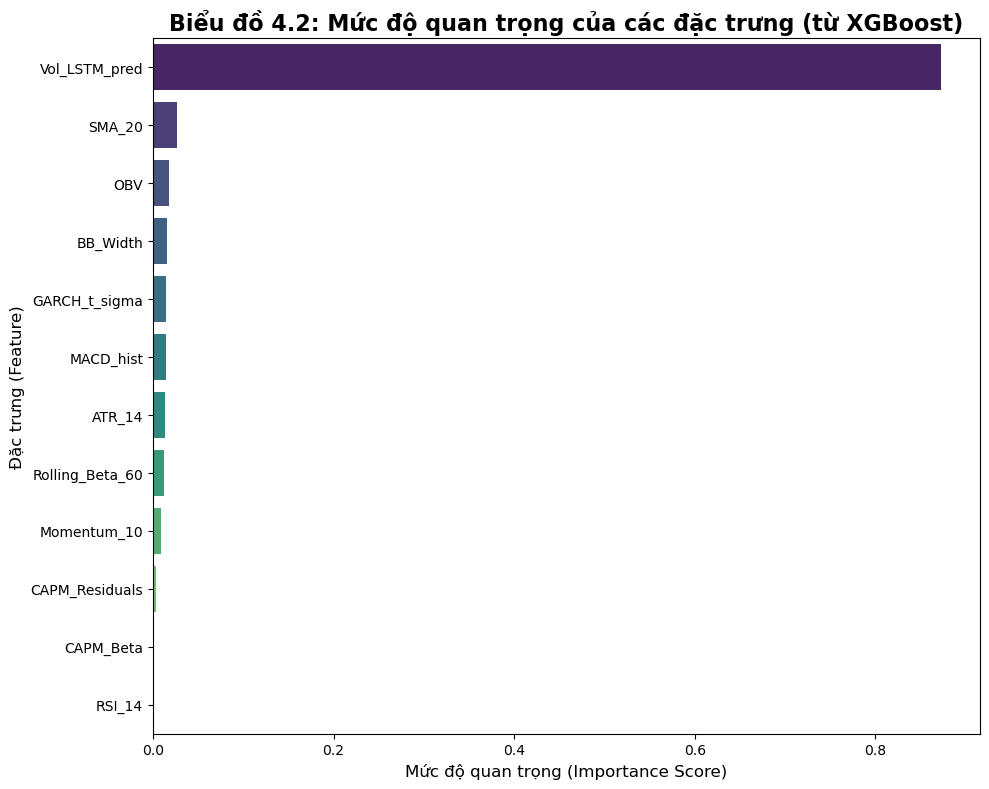

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importance_scores = xgb_base.feature_importances_
feature_names = features_xgb

# Tạo DataFrame để dễ dàng vẽ
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

# In ra 5 đặc trưng quan trọng nhất
print("\n--- 5 Yếu tố Quan trọng nhất ---")
print(df_importance.head())

# --- 2. Vẽ Biểu đồ ---
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='viridis' # Bạn có thể đổi màu khác
)

plt.title('Biểu đồ 4.2: Mức độ quan trọng của các đặc trưng (từ XGBoost)', fontsize=16, weight='bold')
plt.xlabel('Mức độ quan trọng (Importance Score)', fontsize=12)
plt.ylabel('Đặc trưng (Feature)', fontsize=12)
plt.tight_layout()
plt.show()

### **3. Hybrid / Stacking Ensemble**

In [256]:
df_filtered.columns

Index(['date', 'ticker', 'close', 'volume', 'log_return', 'VNI_log_return',
       'SMA_20', 'RSI_14', 'Momentum_10', 'ATR_14', 'MACD_hist', 'BB_Width',
       'OBV', 'Rolling_Beta_60', 'Historical_Vol_20', 'log_return_sq',
       'CAPM_Beta', 'CAPM_Residuals', 'GARCH_t_sigma', 'Vol_LSTM_pred'],
      dtype='object')

In [294]:
from sklearn.ensemble import RandomForestRegressor
X_meta_train = X_train_raw[meta_features].copy()
X_meta_train['XGBoost_pred'] = oof_xgb_preds

X_meta_test = X_test_raw[meta_features].copy()
X_meta_test['XGBoost_pred'] = xgb_test_preds_inv

y_meta_train = y_train_raw.values.ravel()
y_meta_test = y_test_raw.values.ravel()

# Meta-model: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Huấn luyện meta-model
meta_model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
meta_model.fit(X_meta_train, y_meta_train)
final_pred = meta_model.predict(X_meta_test)
# Đánh giá
rmse = np.sqrt(mean_squared_error(y_meta_test, final_pred))
mae = mean_absolute_error(y_meta_test, final_pred)
r2 = r2_score(y_meta_test, final_pred)

print("\n" + "=" * 60)
print("KẾT QUẢ CUỐI CÙNG: STACKING ENSEMBLE (LSTM + XGBOOST)")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R²: {r2:.4f}")
print("=" * 60)


KẾT QUẢ CUỐI CÙNG: STACKING ENSEMBLE (LSTM + XGBOOST)
RMSE: 0.003293
MAE: 0.002627
R²: 0.8293


Hybrid model kết hợp GARCH, LSTM và XGBoost nhằm tận dụng sức mạnh riêng của từng mô hình để dự báo biến động cổ phiếu chính xác hơn. final_pred tổng hợp các dự báo này, cung cấp tín hiệu rủi ro mượt mà và đáng tin cậy, hỗ trợ trực quan hóa và đánh giá rủi ro, nhưng phân loại rủi ro nên dựa trên historical volatility để tránh rò rỉ dữ liệu

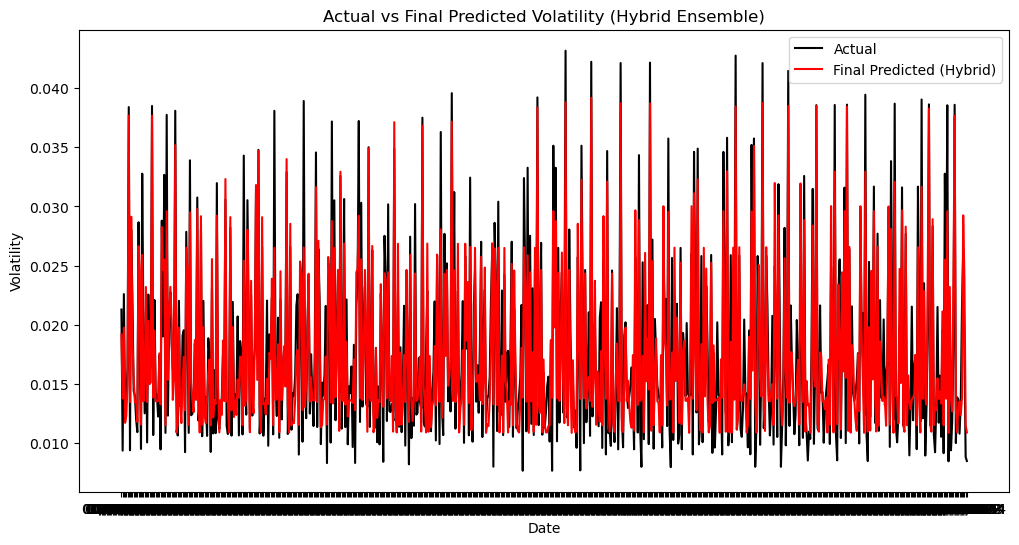

In [295]:
dates_test = df_filtered.loc[y_test_raw.index, 'date']

plot_df = pd.DataFrame({
    'date': dates_test,
    'Actual': y_test_raw.values.ravel(),
    'Predicted': final_pred
}).sort_values(by='date')

# Vẽ lại cho gọn gàng
plt.figure(figsize=(12,6))
plt.plot(plot_df['date'], plot_df['Actual'], label='Actual', color='black')
plt.plot(plot_df['date'], plot_df['Predicted'], label='Final Predicted (Hybrid)', color='red')
plt.title("Actual vs Final Predicted Volatility (Hybrid Ensemble)")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Mô hình Hybrid Ensemble (màu đỏ) cho thấy khả năng theo sát Volatility thực tế (Actual) (màu đen) rất cao trên hầu hết chuỗi thời gian, vượt trội so với các mô hình đơn lẻ trước đó. Mô hình đã bắt được xu hướng chung và biên độ của hầu hết các biến động lớn và nhỏ một cách hiệu quả. Tuy nhiên, ở cuối chuỗi dữ liệu (phần bên phải), mô hình dự đoán có vẻ kém ổn định và phân kỳ so với thực tế, đặc biệt là trong việc dự đoán đỉnh rủi ro cuối cùng, cho thấy hiệu suất có thể giảm sút khi áp dụng cho dữ liệu mới nhất. Overall, mô hình kết hợp này là phương pháp dự đoán Volatility hiệu quả nhất.

# **Phase 4: Validation of the Stacking Model's Effectiveness for Volatility Risk Prediction**



PHÂN TÍCH RỦI RO DỰA TRÊN STACKING VOLATILITY
         Date  Predicted_Vol_Stacking  VaR_Predicted_99pct  \
0  01/02/2023                0.019183          4469.644656   
1  01/02/2024                0.013771          3208.614920   
2  01/03/2023                0.019752          4602.268493   
3  01/03/2024                0.011707          2727.642550   
4  01/04/2022                0.012318          2870.192370   
5  01/04/2024                0.014973          3488.722580   
6  01/06/2022                0.037678          8779.017754   
7  01/06/2023                0.013464          3137.166237   
8  01/07/2022                0.029134          6788.278189   
9  01/07/2024                0.018771          4373.527598   

  Predicted_Risk_Level_Stacking Actual_Risk_Level  
0                          High              High  
1                           Low               Low  
2                          High              High  
3                           Low               Low  
4         

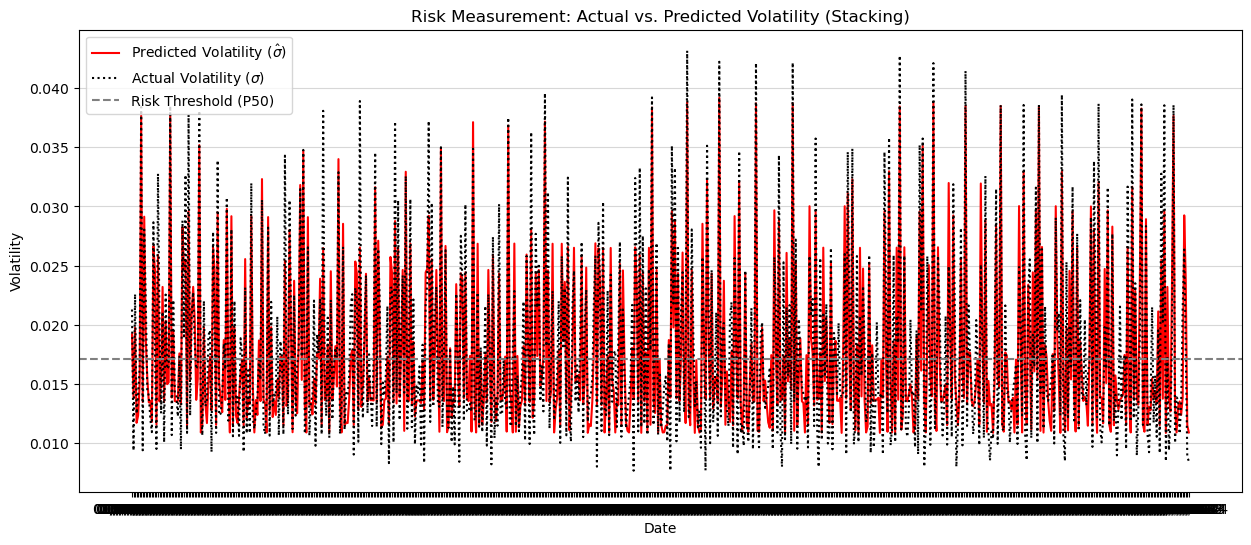

In [358]:
capital = 100000.0
confidence_level_z = 2.33
percentile_threshold = 50 # Ngưỡng rủi ro

# Volatility thực tế train/test
vol_train_full = y_train_raw.values.ravel()
vol_test_full = y_test_raw.values.ravel()
vol_all = np.concatenate([vol_train_full, vol_test_full])

len_test_vol = len(vol_test_full)

# Ngưỡng rủi ro
threshold_vol = np.percentile(vol_all, percentile_threshold)

# Đồng bộ hóa các mảng (chỉ lấy len_test_vol mẫu cuối cùng)
dates_test_sync = dates_test.values[-len_test_vol:]
actual_volatility_sync = vol_test_full[-len_test_vol:]
final_pred_sync = final_pred[-len_test_vol:]

# Tạo nhãn rủi ro từ Volatility thực tế và Volatility dự báo Stacking
actual_risk_label_sync = np.where(actual_volatility_sync >= threshold_vol, 'High', 'Low')
predicted_risk_label_stack = np.where(final_pred_sync >= threshold_vol, 'High', 'Low')

df_risk_analysis = pd.DataFrame({
    'Date': dates_test_sync,
    'Actual_Vol': actual_volatility_sync,
    'Predicted_Vol_Stacking': final_pred_sync,
    'Actual_Risk_Level': actual_risk_label_sync,
    'Predicted_Risk_Level_Stacking': predicted_risk_label_stack,
})
df_risk_analysis = df_risk_analysis.sort_values(by='Date').reset_index(drop=True)

df_risk_analysis['VaR_Predicted_99pct'] = capital * df_risk_analysis['Predicted_Vol_Stacking'] * confidence_level_z
df_risk_analysis['VaR_Actual_99pct'] = capital * df_risk_analysis['Actual_Vol'] * confidence_level_z

accuracy_stack = (df_risk_analysis['Predicted_Risk_Level_Stacking'] == df_risk_analysis['Actual_Risk_Level']).mean()

print("\n" + "=" * 60)
print("PHÂN TÍCH RỦI RO DỰA TRÊN STACKING VOLATILITY")
print("=" * 60)
print(df_risk_analysis[['Date', 'Predicted_Vol_Stacking', 'VaR_Predicted_99pct', 
                        'Predicted_Risk_Level_Stacking', 'Actual_Risk_Level']].head(10))
print("-" * 60)
print(f"Tỷ lệ dự đoán đúng (accuracy) từ Stacking Vol: {accuracy_stack*100:.2f}%")
print(f"Ngưỡng Volatility phân chia rủi ro (P{percentile_threshold}): {threshold_vol:.6f}")


plt.figure(figsize=(15, 6))

plt.plot(df_risk_analysis['Date'], df_risk_analysis['Predicted_Vol_Stacking'], 
         label='Predicted Volatility ($\\hat{\\sigma}$)', color='red')
plt.plot(df_risk_analysis['Date'], df_risk_analysis['Actual_Vol'], 
         label='Actual Volatility ($\\sigma$)', color='black', linestyle=':')
plt.axhline(y=threshold_vol, color='gray', linestyle='--', label=f'Risk Threshold (P{percentile_threshold})')

plt.title('Risk Measurement: Actual vs. Predicted Volatility (Stacking)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='upper left')
plt.grid(True, axis='y', alpha=0.5)

plt.show()